In [1]:
from sklearn.datasets import make_classification

In [2]:
x, y = make_classification(n_samples= 1000 , n_classes =2, n_features= 5 , n_redundant =0 , random_state=1) 

In [3]:
x.shape

(1000, 5)

In [4]:
y.shape

(1000,)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train , x_test, y_train , y_test = train_test_split(x, y, test_size=0.2)

In [7]:
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((800, 5), (200, 5), (800,), (200,))

In [8]:
import pandas as pd

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [10]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [11]:
scores=[]
for name, cif in zip(names, classifiers):
    cif.fit(x_train, y_train)
    scores.append(cif.score(x_test, y_test))

In [12]:
scores

[0.875,
 0.865,
 0.795,
 0.86,
 0.89,
 0.845,
 0.88,
 0.84,
 0.87,
 0.9,
 0.9,
 0.875,
 0.865,
 0.845]

In [13]:
import pandas as pd
import seaborn as sns

In [14]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.875
1,Linear_SVM,0.865
2,Polynomial_SVM,0.795
3,RBF_SVM,0.860
4,Gaussian_Process,0.890
5,Gradient_Boosting,0.845
6,Decision_Tree,0.880
7,Extra_Trees,0.840
8,Random_Forest,0.870
9,Neural_Net,0.900


In [15]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.875000
1,Linear_SVM,0.865000
2,Polynomial_SVM,0.795000
3,RBF_SVM,0.860000
4,Gaussian_Process,0.890000
5,Gradient_Boosting,0.845000
6,Decision_Tree,0.880000
7,Extra_Trees,0.840000
8,Random_Forest,0.870000
9,Neural_Net,0.900000


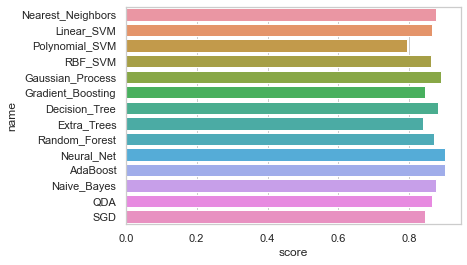

In [16]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)